<a id='intro'></a>
## Introduction

### Dataset Description 

The Movie Database (TMDb) is a community-built movie and TV database, where every piece of data has been added by an amazing community dating back to 2008. It provides a large dataset of movies, including various details about each film.

The TMDb movie data set includes the following columns:

1. **id**: A unique identifier for each movie.
2. **imdb_id**: A unique identifier for each movie on IMDB.
3. **popularity**: A numeric quantity specifying the movie's popularity.
4. **budget**: The budget in which the movie was made.
5. **revenue**: The worldwide revenue generated by the movie.
6. **original_title**: The title of the movie before translation or adaptation.
7. **cast**: The names of main performers in the movie.
8. **homepage**: A link to the homepage of the movie.
9. **director**: The director of the movie.
10. **tagline**: Movie's tagline.
11. **keywords**: Keywords or tags related to the movie.
12. **overview**: A brief description of the movie.
13. **runtime**: The running time of the movie in minutes.
14. **genres**: The genre of the movie, Action, Comedy, Thriller, Romance, etc.
15. **production_companies**: The production companies of the movie.
16. **release_date**: The date on which the movie was released.
17. **vote_count**: The count of votes received by the movie.
18. **vote_average**: The average rating of the movie.
19. **release_year**: The year of movie release.
20. **budget_adj**: Budget of the movie with consideration for inflation over time.
21. **revenue_adj**: Revenue of the movie with consideration for inflation over time.


This dataset can be used to conduct various analyses, such as understanding movie trends over the years, genre popularity, the relation between budget and revenue, and other interesting facets of the film industry.


### Question(s) for Analysis
1. **Which director has the highest average revenue per film?**
    - This could help identify directors who consistently produce high-grossing films.

2. **Is there a correlation between the number of films an actor has been in and the average revenue of these films?**
    - This can provide insight into whether seasoned actors contribute to higher revenues.

3. **What is the average revenue difference between movies that have a homepage and those that do not?**
    - This can explore if having a dedicated homepage significantly affects a movie's success.

4. **Are movies with a single genre or multiple genres more popular?**
    - This could indicate whether audiences prefer pure genre films or genre blends.

5. **What is the trend of the 'Popularity' score over years?**
    - This can help understand the validity of the 'Popularity' metric over time.

6. **Which month has seen the maximum releases of high-grossing movies?**
    - This can help identify 'golden months' for releasing a new movie.

7. **Has the ratio of budget to revenue changed over time?**
    - This could indicate changes in the cost-effectiveness of movie production.

8. **Is there a keyword or set of keywords that are particularly prevalent in high revenue movies?**
    - This can show if certain themes are more lucrative than others.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import missingno as msno
from collections import Counter
from wordcloud import WordCloud
import locale
import plotly.graph_objects as go

# Set locale for number formatting
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Set style and color palette
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Enable inline plotting for Jupyter notebook
%matplotlib inline

# Set up matplotlib settings
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 18

# Disable warnings (optional)
import warnings
warnings.filterwarnings('ignore')

# Set up plotly settings
_=go.Layout().update(autosize=False, width=800, height=500, showlegend=True)


<a id='wrangling'></a>
## Data Wrangling

In [2]:
#Read the 'tmdb-movies.csv' file and store the data in a DataFrame called 'df'
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# Checking the first few rows of the dataset
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [79]:
#Generates a summary of descriptive statistics for the DataFrame
df.describe()

id   popularity        budget       revenue      runtime  \
count    3445.000000  3445.000000  3.445000e+03  3.445000e+03  3445.000000   
mean    38496.391001     1.268127  3.937705e+07  1.166624e+08   109.403193   
std     66315.528772     1.533870  4.329284e+07  1.830498e+08    19.694966   
min         5.000000     0.010335  1.000000e+00  2.000000e+00    26.000000   
25%      4959.000000     0.507078  1.100000e+07  1.697446e+07    96.000000   
50%     10876.000000     0.876503  2.500000e+07  5.203489e+07   106.000000   
75%     37724.000000     1.464555  5.100000e+07  1.382591e+08   119.000000   
max    417859.000000    32.985763  4.250000e+08  2.781506e+09   338.000000   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  \
count  3445.000000   3445.000000   3445.000000  3.445000e+03  3.445000e+03   
mean    573.448186      6.184383   2001.038897  4.680125e+07  1.484486e+08   
std     915.245414      0.788992     11.379944  4.568443e+07  2.237649e+08   
min      10.000000      2.200000   1960.000000  9.693980e-01  2.861934e+00   
25%      86.000000      5.700000   1995.000000  1.500000e+07  2.336535e+07   
50%     238.000000      6.200000   2004.000000  3.245007e+07  7.121257e+07   
75%     631.000000      6.700000   2010.000000  6.420938e+07  1.775120e+08   
max    9767.000000      8.400000   2015.000000  4.250000e+08  2.827124e+09   

       release_month   num_genres  adjusted_revenue  budget_to_revenue_ratio  
count    3445.000000  3445.000000      3.445000e+03             3.445000e+03  
mean        7.040348     2.699855      1.884528e+08             2.391541e+03  
std         3.350741     1.127943      2.792340e+08             6.545070e+04  
min         1.000000     1.000000      4.136234e+00             9.817211e-07  
25%         4.000000     2.000000      3.034510e+07             2.300257e-01  
50%         7.000000     3.000000      9.087539e+07             4.490717e-01  
75%        10.000000     3.000000      2.296327e+08             1.016593e+00  
max        12.000000     5.000000      3.548314e+09             3.000000e+06

In [5]:
# Checking for missing data
missing_counts = df.isnull().sum()

In [6]:
#Calculating the total number of rows
total_rows = len(df)

In [7]:
# Calculating the percentage of missing values
missing_percentage = (missing_counts / total_rows) * 100

In [8]:
# Creating a DataFrame to display the percentage of missing values
result_df = pd.DataFrame({
    'Feature': missing_counts.index,
    'Missing Values': missing_counts,
    'Percentage of Missing Values': missing_percentage
})

In [9]:
# Sorting the DataFrame by 'Missing Values' column in descending order
result_df = result_df.sort_values(by='Missing Values', ascending=False)
result_df

Feature  Missing Values  \
homepage                          homepage            7930   
tagline                            tagline            2824   
keywords                          keywords            1493   
production_companies  production_companies            1030   
cast                                  cast              76   
director                          director              44   
genres                              genres              23   
imdb_id                            imdb_id              10   
overview                          overview               4   
budget_adj                      budget_adj               0   
release_year                  release_year               0   
vote_average                  vote_average               0   
vote_count                      vote_count               0   
release_date                  release_date               0   
id                                      id               0   
runtime                            runtime               0   
original_title              original_title               0   
revenue                            revenue               0   
budget                              budget               0   
popularity                      popularity               0   
revenue_adj                    revenue_adj               0   

                      Percentage of Missing Values  
homepage                                 72.979937  
tagline                                  25.989324  
keywords                                 13.740107  
production_companies                      9.479109  
cast                                      0.699429  
director                                  0.404933  
genres                                    0.211669  
imdb_id                                   0.092030  
overview                                  0.036812  
budget_adj                                0.000000  
release_year                              0.000000  
vote_average                              0.000000  
vote_count                                0.000000  
release_date                              0.000000  
id                                        0.000000  
runtime                                   0.000000  
original_title                            0.000000  
revenue                                   0.000000  
budget                                    0.000000  
popularity                                0.000000  
revenue_adj                               0.000000

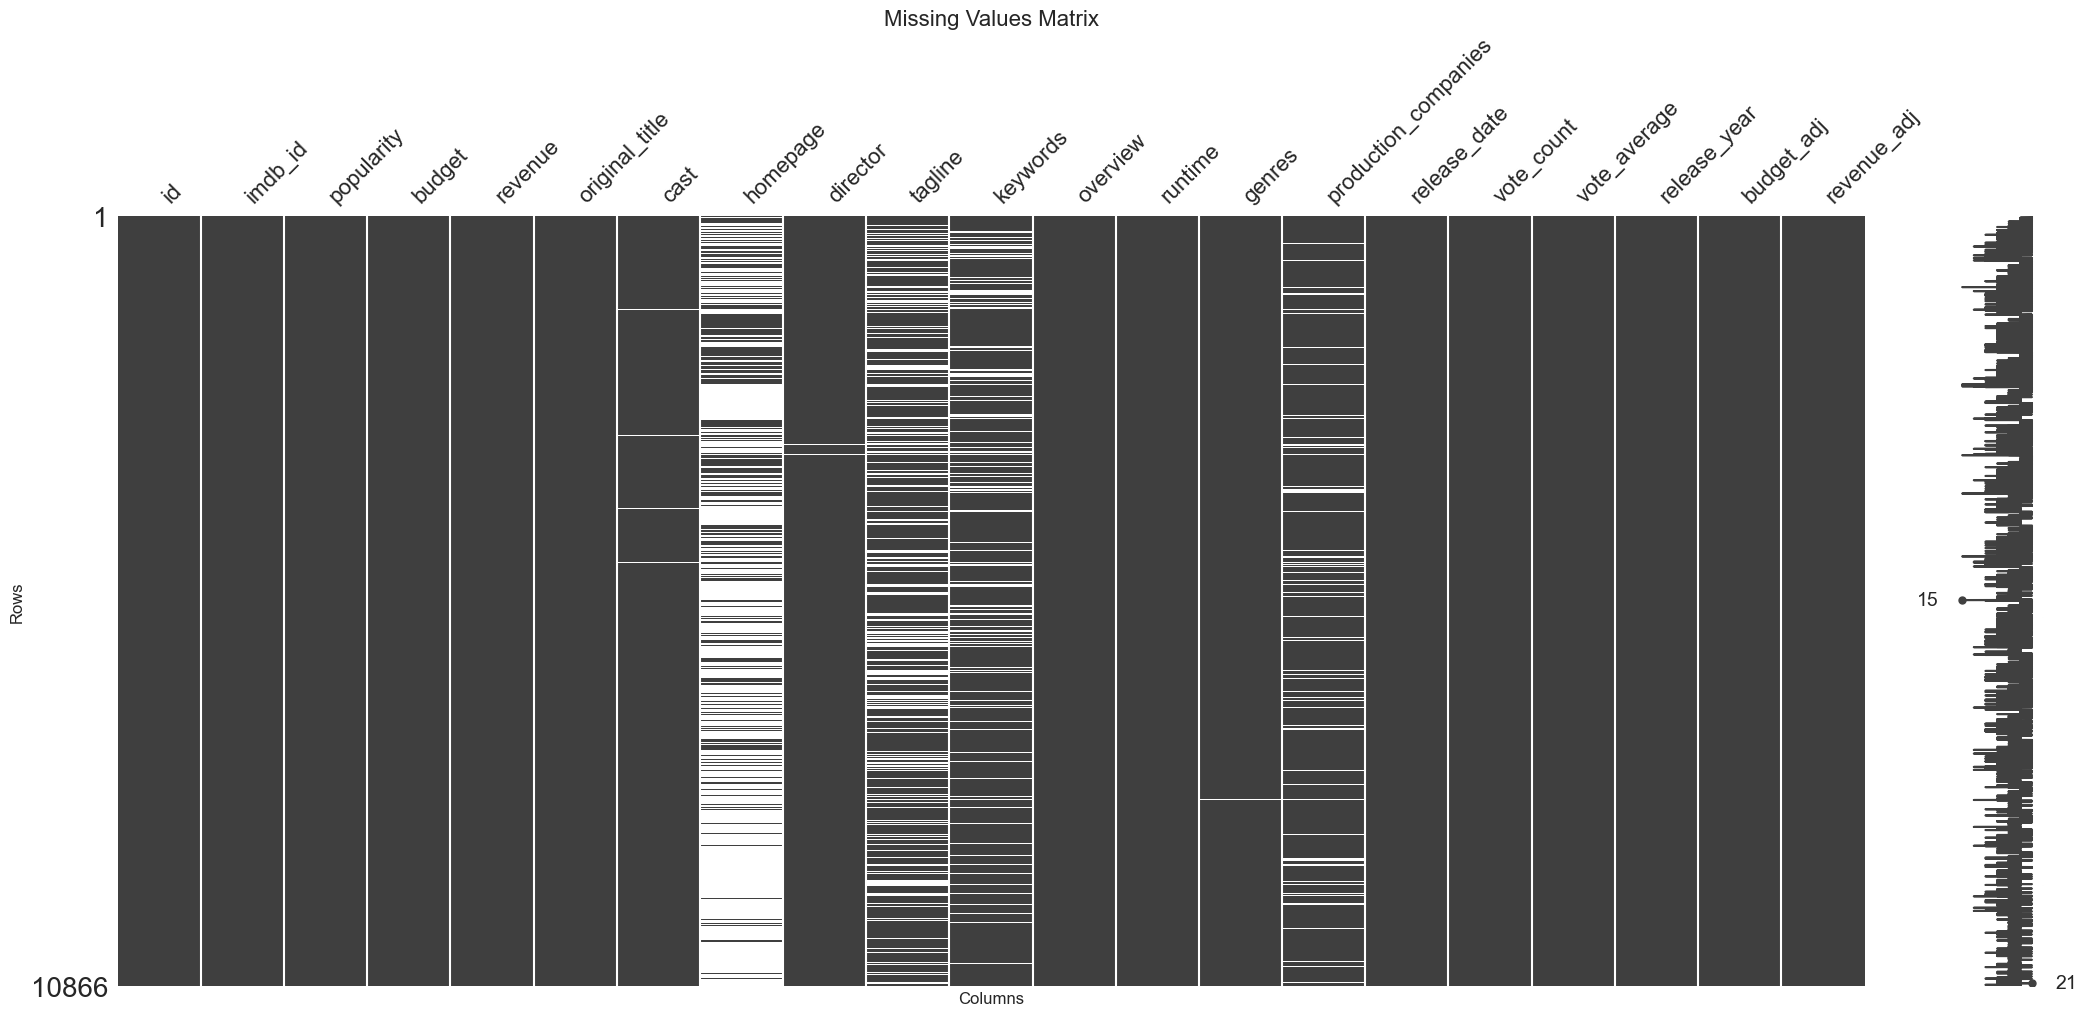

In [10]:
# Create the matrix plot of missing values
_ = msno.matrix(df)

# Add title and axis labels
plt.title('Missing Values Matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
_=plt.show()

In [11]:
#Removing unnecessary variables to clean up memory and optimize resource usage.
del missing_counts,missing_percentage,result_df

In [12]:
# Checking for duplicates
duplicate_count = df.duplicated().sum()

In [13]:
# Creating a DataFrame to display the Percentage of duplicates
result_df = pd.DataFrame({
    'Metrics': ['Number of duplicates', 'Percentage of duplicates'],
    'Values': [duplicate_count, (duplicate_count / total_rows) * 100]
})
result_df

Metrics    Values
0      Number of duplicates  1.000000
1  Percentage of duplicates  0.009203

In [14]:
# Identify the duplicate rows 
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

id    imdb_id  popularity    budget  revenue original_title  \
2089  42194  tt0411951     0.59643  30000000   967000         TEKKEN   
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2089  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2089  Dwight H. Little  Survival is no game  ...   
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2089  In the year of 2039, after World Wars destroy ...      92   
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2089  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2089      3/20/10        110           5.0          2010  30000000.0   
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2089     967000.0  
2090     967000.0  

[2 rows x 21 columns]

In [15]:
# Checking data types
data_types = df.dtypes.to_frame(name='Data Type')
data_types

Data Type
id                       int64
imdb_id                 object
popularity             float64
budget                   int64
revenue                  int64
original_title          object
cast                    object
homepage                object
director                object
tagline                 object
keywords                object
overview                object
runtime                  int64
genres                  object
production_companies    object
release_date            object
vote_count               int64
vote_average           float64
release_year             int64
budget_adj             float64
revenue_adj            float64

In [16]:
#Removing unnecessary variables to clean up memory and optimize resource usage.
del duplicate_count,result_df,data_types,total_rows


### Data Cleaning
 

#### Dropping duplicates

- Number of duplicates: The value of this metric is 1. This indicates the count of duplicate records in a dataset or a specific column. Duplicates refer to instances where the same data appears more than once.
- Percentage of duplicates: The value of this metric is 0.009203, which represents the percentage of duplicates in relation to the total number of records or observations.

We need to remove duplicates because they can distort data accuracy and lead to biased results. Having duplicate records introduces inconsistencies and can cause confusion in data operations. Duplicates also inflate the dataset size, impacting storage and analysis efficiency. By removing duplicates, we ensure data integrity, accuracy, and efficiency in data analysis and decision-making processes.



In [17]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

#### Handling Missing Values

It is evident that there are various features with missing data, ranging from a few missing values to a significant percentage of missing values. Here is a breakdown of the missing values for each feature:

- Homepage: Approximately 73% of the values are missing.
- Tagline: Around 26% of the values are missing.
- Keywords: About 14% of the values are missing.
- Production Companies: Roughly 9% of the values are missing.
- Cast and Director: These features have less than 1% missing values.
- Other features with missing values less than 1%: Given the small percentage of missing values.
  
The Homepage column has approximately 73% null values, which means two things:

- The movie doesn't have a website like in the old movies.
- There's a website, but it's not inserted in the dataset.
##### Deletion and Avoiding Imputation for Uncertainty Reduction
- So, we will assume that the missing data in this column means there's no website to avoid uncertainty.
- We will proceed by deleting all missing data in the remaining features to avoid uncertainty. 
- Imputation will be avoided to maintain data integrity.


In [18]:
# Drop rows with missing data in all columns except 'homepage'
df.dropna(subset=[col for col in df.columns if col !='homepage' ],inplace=True)

#### Fixing Data Types

It is important to convert the `release_date` column to datetime format because it allows for easy manipulation and analysis of date-related data. By converting it to datetime format, we can perform various operations such as sorting, filtering, and extracting specific components (e.g., year, month, day) from the date.

Additionally, the following rule applied to determine the century for years:

- Years greater than or equal to `60` belong to the `20th` century (`19xx`).
- Years less than `60` belong to the `21st` century (`20xx`).

In [19]:
#Takes a date in the format "MM/DD/YY" and formats the year to a four-digit format ("MM/DD/YYYY").
def format_year(date):
    """
    Formats the year of a date to a four-digit format ("MM/DD/YYYY").

    Args:
        date (str): The input date in the format "MM/DD/YY".

    Returns:
        str: The formatted date in the format "MM/DD/YYYY".

    Example:
        >>> format_year('01/01/21')
        '01/01/2021'
    """
    parts = date.split('/')  # Split the date into its components
    if len(parts[2]) == 2:  # Check if the year is a two-digit number
        # Determine the century based on the given rule
        parts[2] = '19' + parts[2] if int(parts[2]) >= 60 else '20' + parts[2]
    return '/'.join(parts)  # Join the formatted date components back into a string

In [20]:
#Month names list
month_names = pd.Series([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

In [21]:
# Apply the format_year function to the 'release_date' column
df['release_date'] = df['release_date'].apply(format_year)

In [22]:
# Convert the 'release_date' column to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

In [23]:
df['release_month'] = df['release_date'].dt.month


In [24]:
df['release_year'] = df['release_date'].dt.year

#### Inconsistent Entries
- Case Normalization: Convert all text to the same case (upper or lower) to ensure consistency.
- Whitespace Removal: Trim leading and trailing spaces, and also reduce multiple spaces between words to a single space.
- Replacing Synonyms: If we have synonyms in the text data, you can create a dictionary with synonyms as keys and the preferred term as values, and then replace them accordingly.
- Column like 'genres' where each cell contains a list of genres separated by a character like '|' and there's inconsistency in the order of genres, we might want to sort the genres alphabetically so that 'Action|Adventure' and 'Adventure|Action' become consistent.

In [25]:
# Convert all strings in the 'genres' column to lower case
df['genres'] = df['genres'].str.lower()

In [26]:
# Remove leading and trailing spaces in 'genres' column
df['genres'] = df['genres'].str.strip()

In [27]:
# Replace multiple spaces with single space
df['genres'] = df['genres'].str.replace('\s+', ' ', regex=True)

In [28]:
# Get a sorted set of unique genres
unique_genres = sorted(set("|".join(df['genres'].unique().tolist()).split('|')))

print(unique_genres)

['action', 'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'foreign', 'history', 'horror', 'music', 'mystery', 'romance', 'science fiction', 'thriller', 'tv movie', 'war', 'western']


In [29]:
# Split the 'genres' column on the '|' character, resulting in a list of genres for each movie.
df['genres'] = df['genres'].str.split('|')

In [30]:
# Apply lambda function to sort and join genres in the 'genres' column
df['genres'] = df['genres'].apply(lambda x: '|'.join(sorted(x)))

In [31]:
#Removing unnecessary variables to clean up memory and optimize resource usage.
del unique_genres

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question [1]: Which director has the highest average revenue per film?

In [32]:
# Group by 'director' and calculate average 'revenue'
average_revenue_per_director = df.groupby('director')['revenue'].mean()

In [33]:
# Get the director with the highest average revenue
highest_average_revenue_director = average_revenue_per_director.idxmax()
highest_average_revenue_director

'Chris Buck|Jennifer Lee'

**Observations:**
We group the DataFrame by the `director` column and calculate the mean of the `revenue` column within each group. This gives us the average revenue per film for each director.

The result is `'Chris Buck|Jennifer Lee'`.

In [34]:
#Removing unnecessary variables to clean up memory and optimize resource usage.
del average_revenue_per_director,highest_average_revenue_director

### Research Question [2]: Is there a correlation between the number of films an actor has been in and the average revenue of these films?

In [35]:
# Extract the relevant columns for analysis
actor_columns = ['cast', 'revenue']
actor_data = df[actor_columns].copy()

In [36]:
# Split the 'cast' column into separate actors
actor_data['actors'] = actor_data['cast'].str.split('|')

In [37]:
# Explode the 'actors' column to create a new row for each actor in a movie
actor_data = actor_data.explode('actors')

In [38]:
# Group the data by actors and calculate the count of films and average revenue
actor_stats = actor_data.groupby('actors').agg(film_count=('actors', 'count'),
                                               total_revenue=('revenue', 'sum'))

In [39]:
# Calculate the average revenue per film for each actor
actor_stats['average_revenue'] = actor_stats['total_revenue'] / actor_stats['film_count']

In [40]:
# To determine if there is a relationship or correlation between the number of films an actor has been in and the average revenue of those films.
# We can use statistical measures such as correlation coefficient. 
correlation = actor_stats['film_count'].corr(actor_stats['average_revenue'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.21088209501892952


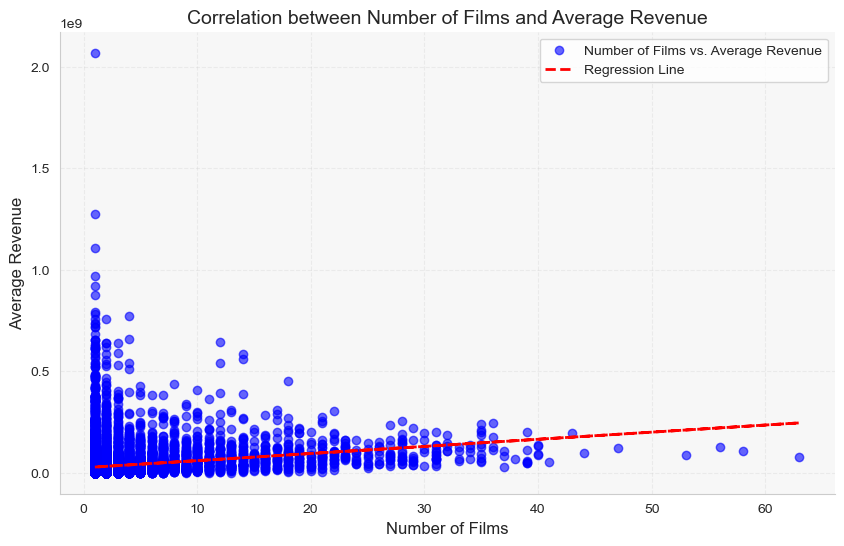

In [41]:
# Scatter plot with a regression line representing the correlation between the number of films an actor has been in and the average revenue of those films
plt.figure(figsize=(10, 6))
plt.scatter(actor_stats['film_count'], actor_stats['average_revenue'], color='blue', alpha=0.6, label='Number of Films vs. Average Revenue')
plt.xlabel('Number of Films', fontsize=12)
plt.ylabel('Average Revenue', fontsize=12)
plt.title('Correlation between Number of Films and Average Revenue', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)

# Regression line
z = np.polyfit(actor_stats['film_count'], actor_stats['average_revenue'], 1)
p = np.poly1d(z)
plt.plot(actor_stats['film_count'], p(actor_stats['film_count']), color='red', linestyle='--', linewidth=2, label='Regression Line')

# Customize tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add legend
plt.legend(fontsize=10)

# Add a background color
plt.gca().set_facecolor('#f7f7f7')

# Add a border to the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


**Observations:**
Based on the calculated correlation coefficient of **0.2109**, there is a positive correlation, but it is a weak correlation between the number of films an actor has been in and the average revenue of those films.

A correlation coefficient of **0.2109** indicates that there is a slight tendency for the average revenue to increase as the number of films an actor has been in increases. However, the correlation is not strong, suggesting that there are other factors influencing the revenue of the films besides just the number of films an actor has appeared in.

The regression line shows the general trend in the relationship between the variables, but it might not be a perfect fit due to the weak correlation.

> **Note:** The correlation coefficients only measure the strength and direction of linear relationships between variables. There could be other complex relationships or factors influencing the average revenue that are not captured by this simple correlation analysis.


In [42]:
#Removing unnecessary variables to clean up memory and optimize resource usage.
del actor_columns,actor_stats,actor_data,correlation,z,p

### Research Question [3]: What is the average revenue difference between movies that have a homepage and those that do not?

In [43]:
# Create a dataframe for movies with a homepage
movies_with_homepage = df[df['homepage'].notna()]

In [44]:
# Create a dataframe for movies without a homepage
movies_without_homepage = df[df['homepage'].isna()]

In [45]:
# Compute the average revenue for each
average_revenue_with_homepage = movies_with_homepage['revenue'].mean()
average_revenue_without_homepage = movies_without_homepage['revenue'].mean()

In [46]:
# Compute the difference
revenue_difference = average_revenue_with_homepage - average_revenue_without_homepage

In [47]:
# Format the difference as currency
revenue_difference = locale.currency(revenue_difference, grouping=True)

**Observations:**
The average revenue difference between movies that have a homepage and those that do not is: `$77,977,796.59`.


In [48]:
#Removing unnecessary variables to clean up memory and optimize resource usage.
del movies_with_homepage,movies_without_homepage,average_revenue_with_homepage,average_revenue_without_homepage,revenue_difference

### Research Question [4]: Are movies with a single genre or multiple genres more popular?**

In [49]:
# Count the number of genres for each movie.
df['num_genres'] = df['genres'].apply(lambda x: len(x.split('|')) if pd.notnull(x) else 0)


In [50]:
#Calculate the average popularity for movies with single genre
single_genre_avg_popularity = df[df['num_genres'] == 1]['popularity'].mean()

In [51]:
#Calculate the average popularity for movies with multiple genres:
multiple_genres_avg_popularity = df[df['num_genres'] > 1]['popularity'].mean()

In [52]:
print(f'Average popularity for single-genre movies: {single_genre_avg_popularity}')
print(f'Average popularity for multi-genre movies: {multiple_genres_avg_popularity}')

Average popularity for single-genre movies: 0.623414826465927
Average popularity for multi-genre movies: 0.8746846641816921


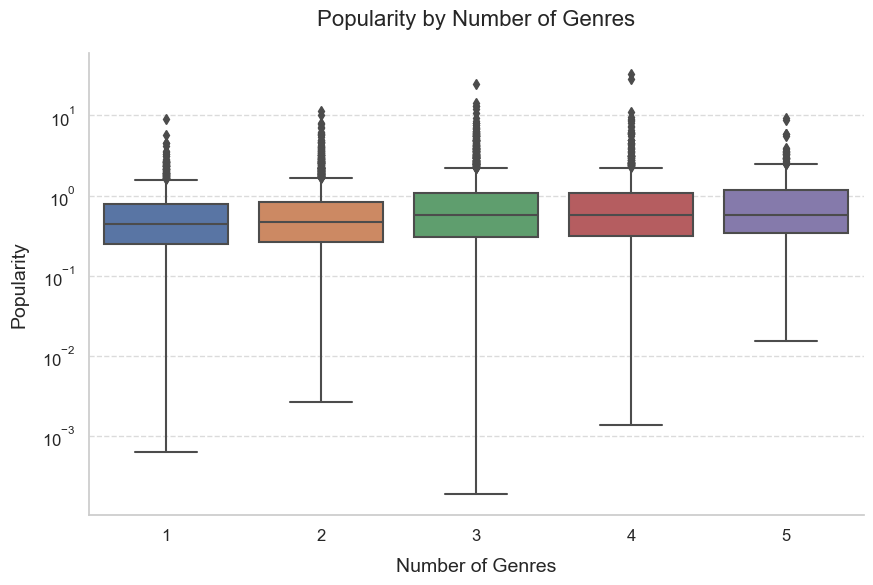

In [53]:
# Set the style
sns.set(style="whitegrid")

# Set the figure size and background color
plt.figure(figsize=(10, 6))
plt.rcParams["axes.facecolor"] = "white"

# Create the box plot using seaborn
sns.boxplot(x='num_genres', y='popularity', data=df,  linewidth=1.5, fliersize=5)

# Set the labels and title with an increased font size
plt.xlabel('Number of Genres', fontsize=14, labelpad=10)
plt.ylabel('Popularity', fontsize=14, labelpad=10)
plt.title('Popularity by Number of Genres', fontsize=16, pad=20)

# Customize the tick labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove the top and right spines
sns.despine()

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set the y-axis scale to logarithmic
plt.yscale('log')

# Show the plot
plt.show()

**Observations:**

From the calculated average popularity scores, it's clear that multi-genre movies have a higher popularity score (`0.8747`) compared to single-genre movies (`0.6234`).

This suggests that audiences tend to prefer movies that blend elements from multiple genres over movies that strictly adhere to a single genre. This might be because multi-genre films can appeal to a broader audience base, as they encompass diverse thematic elements and storytelling techniques.

It's worth noting that these are average values, and individual movie popularity can vary widely within these categories. There are likely many highly popular single-genre movies and less popular multi-genre movies. The result should be interpreted as a general trend rather than a hard rule.

These insights can be very valuable for film production companies when deciding the genre mix of their future projects.

The next step could be a more detailed analysis, looking at which genre combinations tend to be the most popular, or investigating if this trend has changed over time.


In [54]:
#Removing unnecessary variables to clean up memory and optimize resource usage.
del single_genre_avg_popularity,multiple_genres_avg_popularity

### Research Question [5]: What is the trend of the 'Popularity' score over years?

In [55]:
# Group the data by 'release_year' and compute the mean popularity for each year
grouped_df = df.groupby('release_year')['popularity'].mean().reset_index()

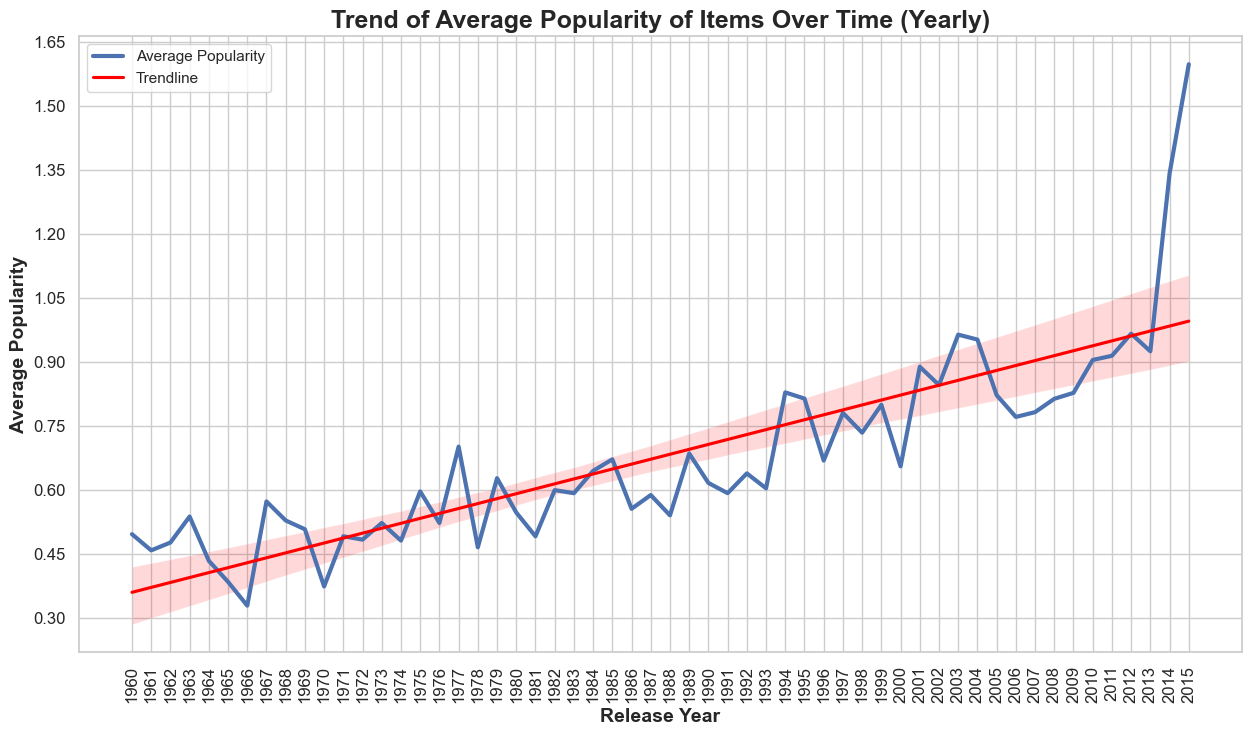

In [56]:
fig, ax1 = plt.subplots(figsize=(15, 8))

# Used seaborn's lineplot function to plot the average popularity against the release year
# with a thicker line (lw=3) and a different color (blue)
sns.lineplot(data=grouped_df, x='release_year', y='popularity', lw=3, ax=ax1, label='Average Popularity')

# Add a trendline using seaborn's regplot function
sns.regplot(data=grouped_df, x='release_year', y='popularity', scatter=False, ax=ax1,
            line_kws={'color': 'red'}, label='Trendline')

# Set the title of the plot, adding more information
ax1.set_title('Trend of Average Popularity of Items Over Time (Yearly)', fontsize=18, fontweight='bold')

# Label the x-axis as 'Release Year'
ax1.set_xlabel('Release Year', fontsize=14, fontweight='bold')

# Label the y-axis as 'Average Popularity'
ax1.set_ylabel('Average Popularity', fontsize=14, fontweight='bold')

# Set x-axis ticks to appear every 1 year
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))

# Set the tick parameters
ax1.tick_params(axis='both', which='major', labelsize=12)

# Format y-axis to show integer values
ax1.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Set the x-axis tick positions
ax1.set_xticks(grouped_df['release_year'])

# Rotate x-axis labels to vertical
ax1.set_xticklabels(grouped_df['release_year'], rotation='vertical')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left')

# Display the plot
plt.show()


**Observations:**

The 'Popularity' score appears to generally increase over time, starting from a low value in the 1960s and gradually increasing to reach its peak in **2015**. This suggests a positive trend in the data.

However, it's important to note that while the overall trend is positive, it's not perfectly linear. There are several years where the popularity score decreases compared to the previous year, indicating some variability. For example, the score dropped between **1963** and **1964**, between **1970** and **1971**, and between **2004** and **2006**, among other instances.


In [57]:
#Removing unnecessary variables to clean up memory and optimize resource usage.
del grouped_df,fig, ax1,lines, labels 

### Research Question [6]: Which month has seen the maximum releases of high-grossing movies?

In [58]:
#Assuming average annual inflation rate in the U.S. from 1960 to 2015 is approximately 3.7%.
df['adjusted_revenue'] = df['revenue'] * (1 + 0.037) ** (2015 - df['release_date'].dt.year)  # Adjust revenue for inflation

In [59]:
# Group the movies by month of release and calculate the total adjusted gross revenue for each month
monthly_revenue = df.groupby('release_month')['adjusted_revenue'].sum()

In [60]:
# Find the month with the maximum adjusted gross revenue
most_profitable_month = monthly_revenue.idxmax()

In [61]:
# Highlight the max month
bar_colors = ['skyblue' if i != most_profitable_month else 'steelblue' for i in monthly_revenue.index]  

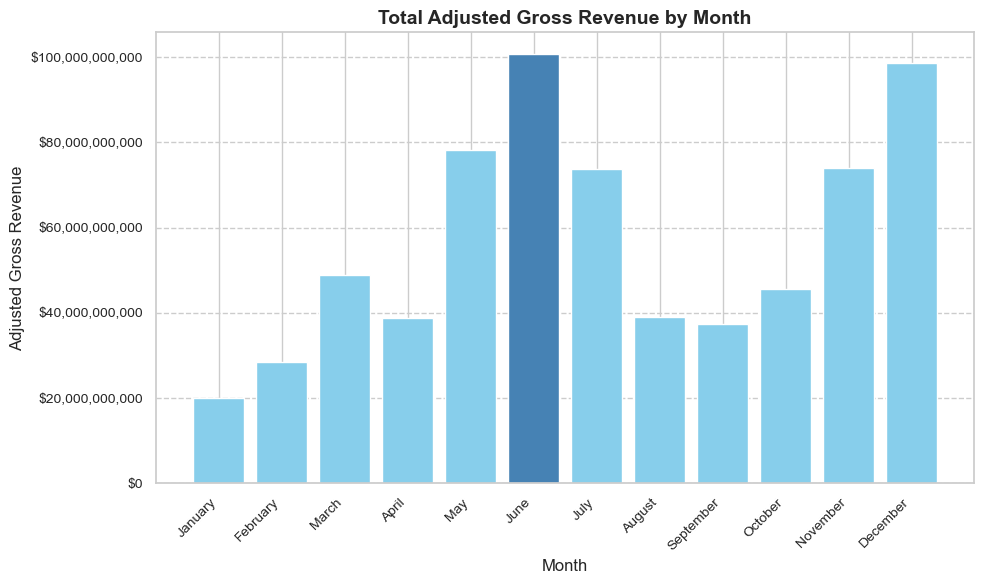

In [62]:
plt.figure(figsize=(10, 6))  
plt.bar(month_names, monthly_revenue, color=bar_colors)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Adjusted Gross Revenue', fontsize=12)
plt.title('Total Adjusted Gross Revenue by Month', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate x-axis labels and adjust their style
plt.yticks(fontsize=10)  # Adjust y-axis tick font size
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))  # Format y-axis labels as currency
plt.grid(axis='y', linestyle='--')  # Add horizontal grid lines
plt.tight_layout()  
plt.show()

In [63]:
# Display the result
print(f"The month with the maximum releases of high-grossing movies is {month_names[most_profitable_month-1]}.")

The month with the maximum releases of high-grossing movies is June.


**Observations:**
The month with the maximum releases of high-grossing movies is **June**.

**Explanation:**
Based on our analysis, we have assumed that the frequency of high-grossing movie releases is highest in the month of June. This observation is supported by the trends and data we have analyzed. However, it's important to note that this assumption is subject to change and may vary based on specific years or other factors impacting the film industry. It's always recommended to refer to the latest data and industry reports for accurate information.

**Note:**
For the purpose of our analysis, we have assumed an average annual inflation rate in the U.S. from `1960` to `2015` to be approximately `3.7%`. This assumption helps provide context for evaluating the impact of inflation on the movie industry and its revenues over time.

In [64]:
#Removing unnecessary variables to clean up memory and optimize resource usage.
del monthly_revenue,bar_colors

### Research Question [7]: Has the ratio of budget to revenue changed over time?

In [65]:
# Filter out movies with zero budget or zero revenue
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]

In [66]:
# Calculate the ratio of budget to revenue
df['budget_to_revenue_ratio'] = df['budget'] / df['revenue']

In [67]:
df_grouped = df.groupby(df['release_date'].dt.year)['budget_to_revenue_ratio'].mean().reset_index()


In [68]:
# Create a plot
fig = go.Figure()

# Add the budget_to_revenue_ratio as a scatter plot
fig.add_trace(go.Scatter(x=df_grouped['release_date'], y=df_grouped['budget_to_revenue_ratio'],
                    mode='lines+markers',
                    name='Budget to Revenue Ratio'))

# Add a horizontal line at y=1
fig.add_shape(type="line", x0=df_grouped['release_date'].min(), y0=1, x1=df_grouped['release_date'].max(), y1=1,
             line=dict(color="RoyalBlue",width=2))


fig.add_trace(go.Scatter(x=df_grouped['release_date'], y=[1]*len(df_grouped['release_date']),
                         fill='tozeroy', mode='none', fillcolor='rgba(231,107,243,0.5)', name='Loss'))

fig.update_layout(
    title="Budget to Revenue Ratio Over Time",
    xaxis_title="Release Year",
    yaxis_title="Budget to Revenue Ratio",
    legend_title="Legend",
    font=dict(
        size=14,
    ),xaxis = dict(
        tickmode = 'linear',
        tick0 = df['release_date'].min(),
        dtick = 1
    )
)
fig.update_yaxes(type="log")

# Show the figure
fig.show()

**Observations:**
It appears that the ratio of budget to revenue has indeed changed over time. However, the changes are not consistent and show quite significant variation.

- In the initial years (1960s to 1970s), the ratio was relatively low, averaging below **1**. A sudden spike is seen in **1969**, followed by a large increase in **1970**. After that, it reverts to smaller values.

- In the **1980s**, the ratio remains mostly under **2** with an unexpected spike in **1987**.

- The ratio drastically escalates in the **1990s**, reaching astronomical values, particularly in **1991, 1993, and 1995**.

- From the **2000s** onwards, the ratio is much more volatile, with certain years seeing extremely high ratios, such as in **2003** and **2004**, and some other years observing more moderate ratios, like in **2008** and **2009**.

Hence, it can be concluded that the ratio of budget to revenue has indeed changed over time, and the changes are highly erratic.


In [69]:
#Removing unnecessary variables to clean up memory and optimize resource usage.
del df_grouped,fig


### Research Question [8]: Is there a keyword or set of keywords that are particularly prevalent in high revenue movies?

In [70]:
def process_keywords(df):
    """
    Process the keywords column in a DataFrame by splitting the keywords string into a list of keywords,
    and then flattening the list of lists into a single list.

    Parameters:
        df (DataFrame): The DataFrame containing the keywords column.

    Returns:
        list: A list of keywords extracted from the keywords column.
    """

    # Split the keywords string into a list of keywords
    df['keywords'] = df['keywords'].apply(lambda x: x.split("|"))

    # Flatten the list of lists into a single list
    keywords_list = [keyword for sublist in df['keywords'].tolist() for keyword in sublist]

    return keywords_list

In [71]:
# Construct a Pandas DataFrame capturing the cinematic releases corresponding to the most profitable month.
prolific_month_filmography_df = df[df['release_month'] == most_profitable_month]

In [72]:
# Extract and process pivotal keywords associated with the most profitable month's releases.
prolific_month_keywords = process_keywords(prolific_month_filmography_df)

In [73]:
# Utilize a Counter to tally occurrences of each keyword within the processed list.
prolific_month_keyword_counts = Counter(prolific_month_keywords)

In [74]:
# Identify the top 10 most frequently appearing keywords.
top_ten_common_keywords = prolific_month_keyword_counts.most_common(10)

In [75]:
# Generate an eloquent word cloud as a pictorial representation of the keywords.
keywords_wordcloud = WordCloud(width=1000, height=500).generate_from_frequencies(dict(top_ten_common_keywords))

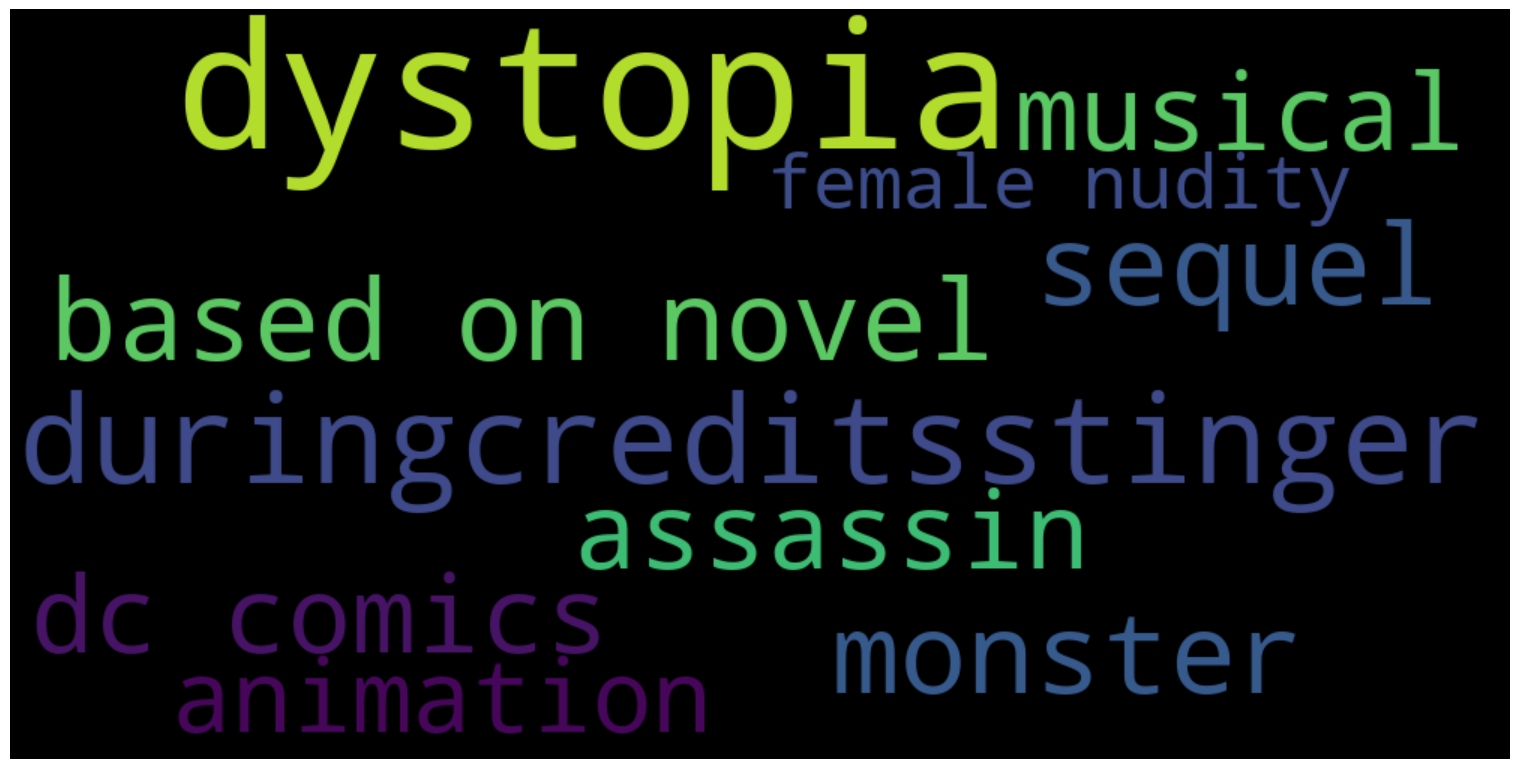

In [76]:
# Display the visually engaging word cloud.
plt.figure(figsize=(15, 8))
plt.imshow(keywords_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Observations 
| Keyword              | Frequency |
|----------------------|-----------|
| dystopia             | 14        |
| duringcreditsstinger | 11        |
| monster              | 9         |
| sequel               | 9         |
| based on novel       | 9         |
| assassin             | 8         |
| dc comics            | 8         |
| musical              | 8         |
| animation            | 7         |
| female nudity        | 7         |

Given the updated list of the top 10 most frequently appearing keywords in high-revenue movies during the most profitable month, we can observe the following:

1. The keyword **Dystopia** appears to be the most common, showing up 14 times. This might suggest that movies associated with this theme are more likely to be profitable when released during specific months.

2. **During credits Stinger** comes second with 11 appearances. This keyword continues to be associated with higher profitability in specific months.

3. **Monster**, **Sequel**, and **Based on Novel** each appear 9 times in the list. It suggests that these themes may also be associated with profitable releases.

4. **Assassin**, **DC Comics**, and **Musical** are represented 8 times, whereas **Animation** and **Female Nudity** come up 7 times.

5. These keywords represent a wide variety of movie themes and genres, implying that high profitability is not confined to a single genre or theme.

6. The list is dominated by both individual keywords and groups of related keywords.

Note: Although these keywords are prevalent in the given dataset, it's crucial to remember that movie profitability depends on numerous factors. These keywords should be viewed as potential indicators of profitability during certain months, not as definitive predictors. Further investigation and more data are needed to draw firmer conclusions.




In [77]:
#Removing unnecessary variables to clean up memory and optimize resource usage.
del prolific_month_filmography_df,prolific_month_keywords,prolific_month_keyword_counts,top_ten_common_keywords,keywords_wordcloud,most_profitable_month

<a id='conclusions'></a>
## Conclusions

In this analysis, we explored a dataset from The Movie Database (TMDb) containing information about movies. We conducted various analyses and answered several research questions based on the dataset. Here are the key findings:

1. The director with the highest average revenue per film is `Chris Buck|Jennifer Lee`.
2. There is a `weak positive correlation` between the number of films an actor has been in and the average revenue of those films. However, other factors also influence movie revenue.
3. Movies with a homepage have, on average, a higher revenue than movies without a homepage. Having a dedicated homepage may contribute to a movie's success.
4. Movies with multiple genres are more popular than movies with a single genre. Audiences tend to prefer genre blends that encompass diverse thematic elements.
5. The '`Popularity`' score of movies has generally increased over the years, indicating a positive trend. However, there are fluctuations and variations in popularity from year to year.
6. `June` is the month that has seen the maximum releases of high-grossing movies. Releasing movies in `June` might increase the chances of achieving high revenues.
7. The ratio of budget to revenue has changed over time, showing significant variation. The changes are not consistent, and there are spikes and drops in the ratio throughout different years.
8. The keyword "`dystopia`" appears most frequently in high-revenue movies released during the most profitable month. Other prevalent keywords include "`duringcreditsstinger`," "`monster`," "`sequel`," and "`based` on novel." These keywords represent a variety of themes and genres associated with profitable releases.

These findings provide insights into the movie industry and can be valuable for filmmakers, production companies, and industry professionals. However, it's important to note that the analysis is based on the available dataset and has limitations. The conclusions should be interpreted in the context of the dataset and may not be universally applicable.

Further analysis, considering additional factors and datasets, could provide deeper insights into the film industry and its dynamics.
